In [2]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -a "Kenneth Brezinski" -v

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Kenneth Brezinski

Python implementation: CPython
Python version       : 3.9.10
IPython version      : 8.0.1



In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
df_ww = pd.read_csv('data/WW-measure.csv')
df_mob = pd.read_csv('data/mobility.csv')

In [159]:
df_ww.tail()

,uWWMeasureID,reportDate,sampleID,type,value,unit,fractionAnalyzed,aggregation,qualityFlag,reporterID,...,accessToProvHA,accessToOtherProv,analysisDate,typeOther,unitOther,aggregationOther,index,accessToSelf,accessToDetails,notes
3919,PPMoVTHU,2022-02-07,THU_20220130,nPPMoV,137058.119203,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3920,PPMoVTNT,2022-02-07,TNT_20220130,nPPMoV,104627.552847,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3921,PPMoVHDA,2022-02-08,HDA_20220131,nPPMoV,65239.452533,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3922,PPMoVHHA,2022-02-08,HHA_20220131,nPPMoV,91821.670838,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3923,PPMoVHMC,2022-02-08,HMC_20220131,nPPMoV,64047.472613,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
## need to remove NaNs from date column
## sampleID needs to turn into datetime

In [136]:
parsed_date = pd.to_datetime(df_ww['sampleID'].apply(lambda d: d.split('_')[1])).rename('date')
df_ww = pd.concat([parsed_date, df_ww[['uWWMeasureID', 'value']]], axis=1)

In [137]:
# test example on Ontario WW
df_ww_ON = df_ww[df_ww['uWWMeasureID'].apply(lambda x: x.endswith('TAB'))]
df_ww_ON.head(2)

,date,uWWMeasureID,value
0,2021-04-01,covN1TAB,52.530044
1,2021-04-04,covN1TAB,74.892574


In [171]:
# test example on Ontario mobility
df_ON = df_mob[df_mob['location_key'].apply(lambda x: x.startswith('CA_ON') if isinstance(x, str) else False)]
df_ON.head(2)

,date,location_key,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential
1366142,2020-02-15,CA_ON,2.0,3.0,20.0,5.0,1.0,-1.0
1366143,2020-02-16,CA_ON,16.0,13.0,44.0,5.0,-2.0,-2.0


In [172]:
df_ON.loc[:, 'date'] = pd.to_datetime(df_ON['date'], infer_datetime_format=True)

C:\Users\Jamie\AppData\Local\Temp\ipykernel_13100\1281624643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ON.loc[:, 'date'] = pd.to_datetime(df_ON['date'], infer_datetime_format=True)


In [177]:
df_merge = pd.merge(df_ON, df_ww_ON, how='outer', on='date').set_index('date')
df_merge.head(10)

,location_key,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,uWWMeasureID,value
date,,,,,,,,,
2020-02-15,CA_ON,2.0,3.0,20.0,5.0,1.0,-1.0,NaN,NaN
2020-02-16,CA_ON,16.0,13.0,44.0,5.0,-2.0,-2.0,NaN,NaN
2020-02-17,CA_ON,-26.0,-37.0,70.0,-40.0,-72.0,16.0,NaN,NaN
2020-02-18,CA_ON,-1.0,12.0,-5.0,2.0,0.0,1.0,NaN,NaN
2020-02-19,CA_ON,0.0,4.0,-4.0,-2.0,1.0,0.0,NaN,NaN
2020-02-20,CA_ON,4.0,4.0,3.0,0.0,2.0,0.0,NaN,NaN
2020-02-21,CA_ON,1.0,-3.0,11.0,-1.0,-7.0,1.0,NaN,NaN
2020-02-22,CA_ON,8.0,6.0,44.0,11.0,7.0,-2.0,NaN,NaN
2020-02-23,CA_ON,12.0,6.0,53.0,9.0,5.0,-1.0,NaN,NaN


<AxesSubplot:xlabel='date'>

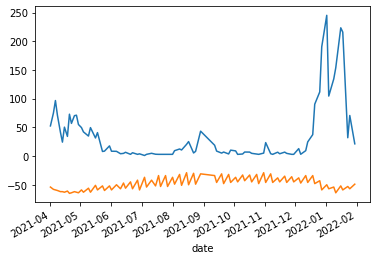

In [179]:
tmp = df_merge[df_merge['uWWMeasureID'].apply(lambda i: i.endswith('N1TAB') if isinstance(i, str) else False)]
tmp['value'].plot()
tmp['mobility_transit_stations'].plot()